### CSE-221710304030-K.eswar sai suhas reddy

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv");
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
df.drop("CASENUM",axis=1,inplace=True)

In [4]:
df.shape

(1340, 6)

In [5]:
df.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ATTORNEY,1340.0,0.488806,0.500061,0.0,0.0,0.0000,1.0000,1.000
CLMSEX,1328.0,0.558735,0.496725,0.0,0.0,1.0000,1.0000,1.000
CLMINSUR,1299.0,0.907621,0.289671,0.0,1.0,1.0000,1.0000,1.000
SEATBELT,1292.0,0.017028,0.129425,0.0,0.0,0.0000,0.0000,1.000
CLMAGE,1151.0,28.414422,20.304451,0.0,9.0,30.0000,43.0000,95.000
LOSS,1340.0,3.806307,10.636903,0.0,0.4,1.0695,3.7815,173.604


In [7]:
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace=True)
    return col
df.apply(lambda col:fill_na(col))
df.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

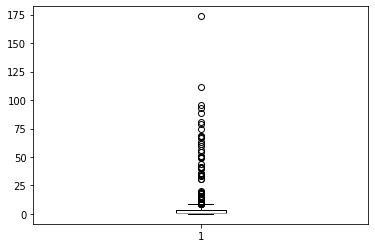

In [8]:
# OUtliers formula //points<q1-(1.5*IQR) and q3+(1.5*IQR)<potins where IQR=q3-q1
plt.boxplot(df.LOSS)
plt.show()

### Find the frequency of categories in the CLMSEX column and plot a graph. Write the observations which category people are more.


In [9]:
df.CLMSEX.value_counts()

1.0    754
0.0    586
Name: CLMSEX, dtype: int64

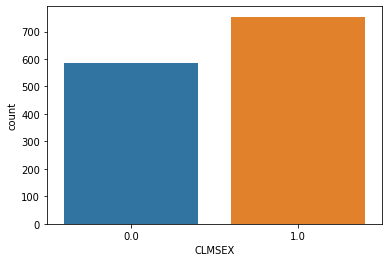

In [66]:
sns.countplot(df.CLMSEX)

#### people with CLMSEX 1 are more in number

### Visualize how many claimants are going to hire an attorney with respect to CLMSEX i.e., out of male claimants how many will hire an attorney; out of female how many will hire an attorney


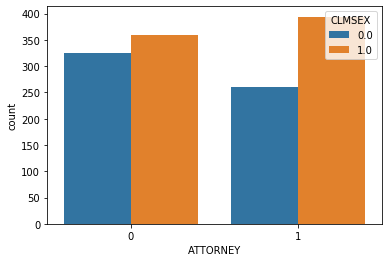

In [11]:
sns.countplot(df.ATTORNEY,hue=df.CLMSEX)

### Check the correlation of the dataset and visualize it through heatmap

In [13]:
df.corr()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
ATTORNEY,1.000000,0.076564,0.076631,-0.055848,-0.016396,-0.219715
CLMSEX,0.076564,1.000000,0.065976,-0.016327,-0.013789,-0.028412
CLMINSUR,0.076631,0.065976,1.000000,0.019953,0.030389,0.004641
SEATBELT,-0.055848,-0.016327,0.019953,1.000000,-0.018020,0.111879
CLMAGE,-0.016396,-0.013789,0.030389,-0.018020,1.000000,0.051575
LOSS,-0.219715,-0.028412,0.004641,0.111879,0.051575,1.000000


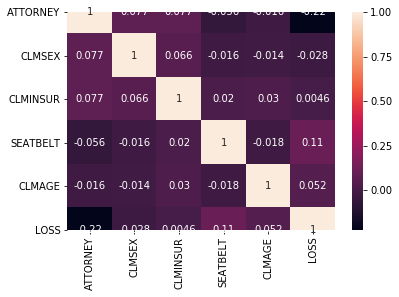

In [14]:
sns.heatmap(df.corr(),annot=True,annot_kws={"ha": 'center',"va": 'center'})

In [15]:
df.CLMAGE.describe()

count    1340.000000
mean       25.817164
std        19.879401
min         0.000000
25%        10.000000
50%        17.000000
75%        40.000000
max        95.000000
Name: CLMAGE, dtype: float64

### Plot the visualizations of the column CLMAGE and find the pattern in the data like which age group people were more as claimants 


In [16]:
df['CLMRANGE']=pd.cut(df.CLMAGE,bins=[0,10,17,40,95])

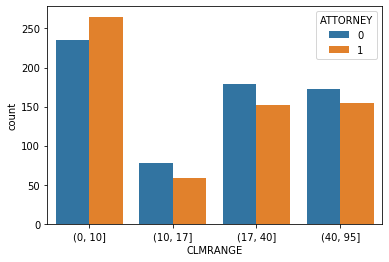

In [17]:
sns.countplot(df.CLMRANGE,hue=df.ATTORNEY)

In [18]:
df.drop("CLMRANGE",axis=1,inplace=True)

In [19]:
#Calculate the number people who did not wear SEATBELT, what is their percentage of hiring attorney 

at=df[df.SEATBELT==0]
at[at.ATTORNEY==1]

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
4,1,0.0,1.0,0.0,30.0,0.038
8,1,1.0,1.0,0.0,60.0,0.874
9,1,0.0,1.0,0.0,10.0,0.350
...,...,...,...,...,...,...
1333,1,0.0,1.0,0.0,49.0,0.000
1334,1,1.0,1.0,0.0,16.0,0.060
1335,1,0.0,1.0,0.0,10.0,0.576
1337,1,1.0,1.0,0.0,39.0,0.099


### There are 649 claimants are there who hasn't wear seatbelt

In [20]:
x=df.drop("ATTORNEY",axis=1)
y=df.ATTORNEY

In [21]:
x

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,10.0,0.576
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [22]:
y

0       0
1       1
2       1
3       0
4       1
       ..
1335    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1340, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [24]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()

In [25]:
logr.fit(x_train,y_train) #train

C:\Users\Vaishnavi Batchu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_train_pred=logr.predict(x_train)

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_train,y_train_pred)
con

array([[315, 170],
       [107, 346]], dtype=int64)

In [44]:
tn=con[0][0]
fp=con[0][1]
fn=con[1][0]
tp=con[1][1]

In [45]:
print("True_positive:",tp)
print("True_negative",tn)
print("False_positive:",fp)
print("False_negative",fn)

True_positive: 346
True_negative 315
False_positive: 170
False_negative 107


In [46]:
accuracy_score(y_train,y_train_pred)


0.7046908315565032

In [60]:
accuracy=(tp+tn)/(tp+tn+fp+fn)   #(TP+TN)/(TP+TN+FP+FN).

accuracy

0.7046908315565032

In [48]:
from sklearn.metrics import precision_score,recall_score
recall_score(y_train,y_train_pred)

0.7637969094922737

In [49]:
precision_score(y_train,y_train_pred)

0.6705426356589147

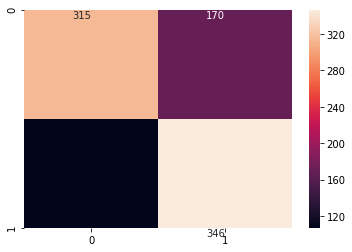

In [50]:
sns.heatmap(con,annot=True,fmt='3.0f',annot_kws={'size':'10',"ha": 'right',"va": 'top'})

### Make predictions on test data and calculate the precision, recall and f1-score.

In [51]:
y_pred=logr.predict(x_test)  #test

In [52]:
con1=confusion_matrix(y_test,y_pred)
con1

array([[120,  80],
       [ 42, 160]], dtype=int64)

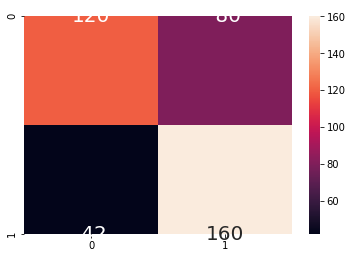

In [53]:
sns.heatmap(con1,annot=True,fmt='3.0f',annot_kws={'size':'20',"ha": 'center',"va": 'center'},color='r')
plt.show()

In [54]:
tn1=con1[0][0]
fp1=con1[0][1]
fn1=con1[1][0]
tp1=con1[1][1]

In [55]:
accuracy_score(y_test,y_pred)

0.6965174129353234

In [56]:
print("True_positive:",tp1)
print("True_negative",tn1)
print("False_positive:",fp1)
print("False_negative",fn1)

True_positive: 160
True_negative 120
False_positive: 80
False_negative 42


In [61]:
accuracy=(tp1+tn1)/(tp1+tn1+fp1+fn1)
accuracy

0.6965174129353234

In [62]:
precision_score(y_test,y_pred)

0.6666666666666666

In [63]:
recall_score(y_test,y_pred)

0.7920792079207921

In [64]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.7239819004524886